# Eclat - Ejemplo - Movies

**Contexto**  
Este conjunto de datos ficticio, con una lista de películas asociadad de manera aleatoria.  

**Contenido**  
Contiene 7501 renglones y 20 columnas, una por película.

**Planteamiento del problema**  
Se busca encontrar las asociaciones de películas que pudieran recomendarse al mismo tiempo.

In [ ]:
# Importar extensión para ejecutar R

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
# Instalar librerías
install.packages("arules")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpXzDe1q/downloaded_packages’



In [3]:
%%R
# Importar librerias
library(arules)


Attaching package: ‘arules’



    abbreviate, write




## Cargar Datos

In [5]:
%%R
# Importar los datos
df = read.csv("Market_Basket_Optimisation.csv", header = FALSE)
df = read.transactions("Market_Basket_Optimisation.csv",
                            sep = ",", rm.duplicates = TRUE)

distribution of transactions with duplicates:
1 
5 


## EDA

In [6]:
%%R
# Revisar los datos
summary(df)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus


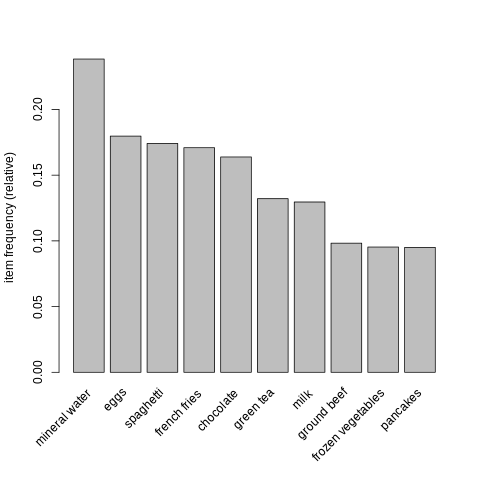

In [7]:
%%R
itemFrequencyPlot(df, topN = 10)

## Modelado

In [8]:
%%R
# Entrenamiento
model = eclat(data = df,
                parameter = list(support = 0.003, minlen = 2))

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE   0.003      2     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 22 

create itemset ... 
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating sparse bit matrix ... [115 row(s), 7501 column(s)] done [0.01s].
writing  ... [1328 set(s)] done [0.04s].
Creating S4 object  ... done [0.00s].


## Visualizacion

In [9]:
%%R
# Resultados
inspect(sort(model, by = 'support')[1:10])

     items                              support    count
[1]  {mineral water, spaghetti}         0.05972537 448  
[2]  {chocolate, mineral water}         0.05265965 395  
[3]  {eggs, mineral water}              0.05092654 382  
[4]  {milk, mineral water}              0.04799360 360  
[5]  {ground beef, mineral water}       0.04092788 307  
[6]  {ground beef, spaghetti}           0.03919477 294  
[7]  {chocolate, spaghetti}             0.03919477 294  
[8]  {eggs, spaghetti}                  0.03652846 274  
[9]  {eggs, french fries}               0.03639515 273  
[10] {frozen vegetables, mineral water} 0.03572857 268  
